# Examples of feature extraction

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import immas
from immas import MammogramImage
from immas.basic_functions import show_image_plt

## Feature extraction using MammogramImage class

Let's read sample mammogram image first

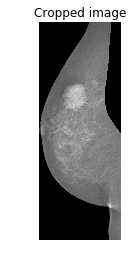

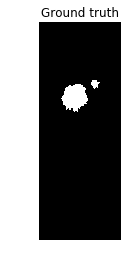

In [2]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, ground_truth_path=path_ground_truth, pmuscle_mask_path=pectoral_muscle)

show_image_plt(mm.image_data,'Cropped image')
show_image_plt(mm.cropped_ground_truth,'Ground truth')

Now we can do features and contours extraction using `get_img_features` function, by default it selects 10 biggest (by area) false positive contours, and true positive contours (masses) if any available.

In [3]:
features, contours = mm.get_img_features()

help(mm.get_img_features)

/home/okozyn/Projects/AIA-2018/immas/segmentation.py:49: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


Help on method get_img_features in module immas.io.mammogram:

get_img_features(contour_max_number=10) method of immas.io.mammogram.MammogramImage instance
    Finds mass candidates contours and their features.
    
    Args:
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



Let's check what output we have. `class_id` field equals to 1 for true positive (masses) and -1 for false positive (not masses). Please pay attention that features are returned in `pandas.DataFrame` format.

In [4]:
features

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,4224.076784,23302.5,60.932813,382.429415,32682.298070,19071.931634,1.0,-2.158255e+10,-1.0
1,2123.929265,12183.0,29.465648,413.464526,32596.632523,18801.860807,1.0,-2.345094e+09,-1.0
2,964.354461,7791.5,9.498225,820.311172,32766.357361,18938.463817,1.0,4.447417e+10,-1.0
3,1184.888512,5667.5,19.713039,287.500063,33529.324276,18959.452991,1.0,-1.479250e+11,-1.0
4,1136.420477,4818.0,21.330520,225.873538,32298.799508,18939.138184,1.0,1.376212e+11,-1.0
5,1393.682449,4751.5,32.530225,146.064161,32703.288885,18810.358412,1.0,4.602172e+10,-1.0
6,549.612259,3826.0,6.282869,608.957485,32882.951665,19062.852484,1.0,-1.526180e+11,-1.0
7,1219.917949,2752.5,43.025314,63.973966,32506.762227,18756.725175,1.0,2.003122e+11,-1.0
8,550.139171,1592.5,15.123623,105.298845,33364.647771,19043.606217,1.0,-5.853688e+11,-1.0
9,705.962545,1480.5,26.788293,55.266679,32823.145928,18891.401731,1.0,-1.780862e+11,-1.0


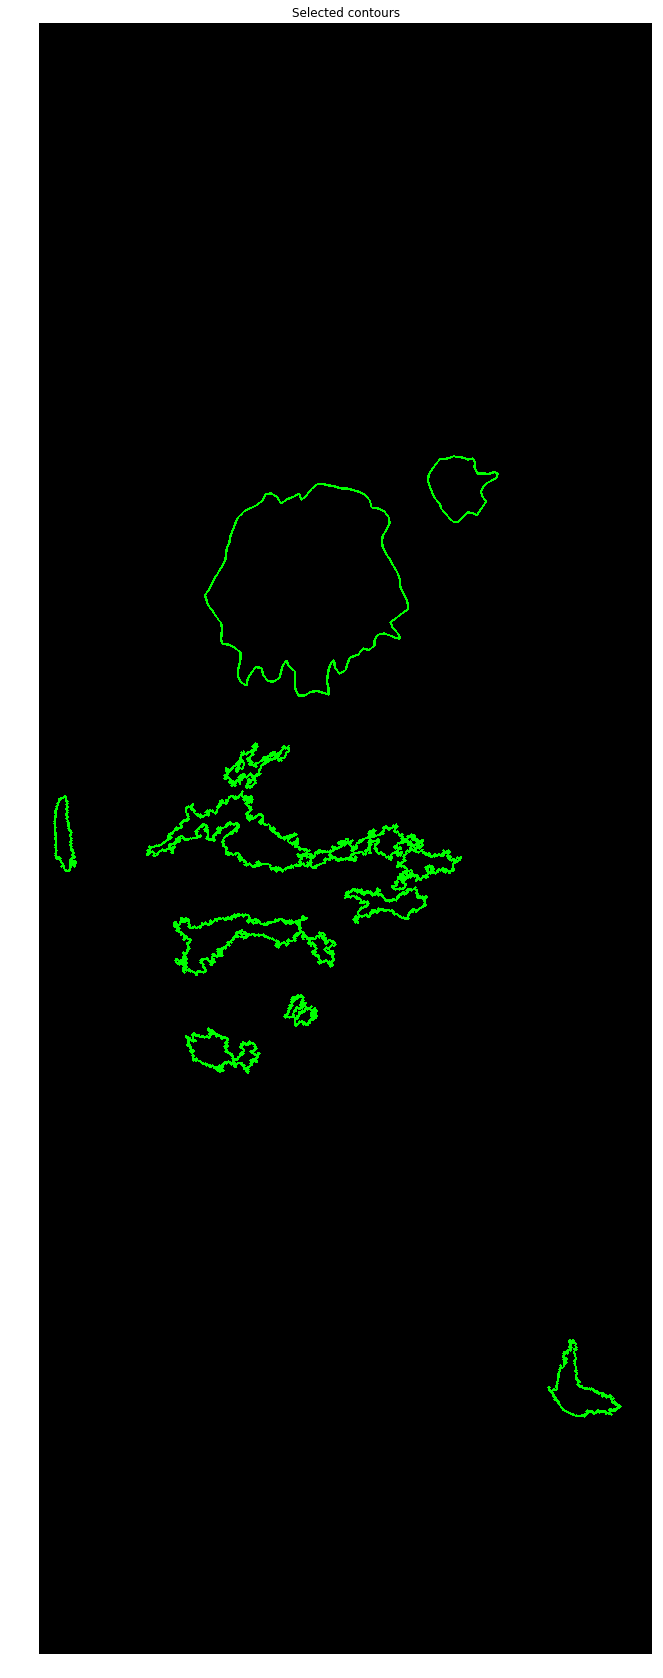

In [17]:
mm_shape = mm.image_data.shape

img_color = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color, contours, -1, (0,255,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color,'Selected contours')

## Feature extraction using get_img_features function

Features can be extracted from mammogram images using this helper function as well. We need to provide ground thruth mask separately.

In [6]:
from immas import get_img_features

help(get_img_features)

Help on function get_img_features in module immas.features.get_features:

get_img_features(img, mask_ground_truth=None, contour_max_number=10)
    Function calculates features of the given image. Class id for the true positive is 1,
    and for the false positive (not masses) -1.
    
    Args:
        img (numpy.array): image, which features to find
        mask_ground_truth (np.array): mask for extracting mass region, default is None.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



In [7]:
features2, contours2 = get_img_features(mm.image_data)

/home/okozyn/Projects/AIA-2018/immas/segmentation.py:49: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [8]:
features2

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,3730.790428,98674.0,11.225071,8790.500926,32605.740959,18878.544965,1.0,1.713565e+10,-1.0
1,4224.076784,23302.5,60.932813,382.429415,32682.298070,19071.931634,1.0,-2.158255e+10,-1.0
2,2123.929265,12183.0,29.465648,413.464526,32596.632523,18801.860807,1.0,-2.345094e+09,-1.0
3,964.354461,7791.5,9.498225,820.311172,32766.357361,18938.463817,1.0,4.447417e+10,-1.0
4,1184.888512,5667.5,19.713039,287.500063,33529.324276,18959.452991,1.0,-1.479250e+11,-1.0
5,1136.420477,4818.0,21.330520,225.873538,32298.799508,18939.138184,1.0,1.376212e+11,-1.0
6,1393.682449,4751.5,32.530225,146.064161,32703.288885,18810.358412,1.0,4.602172e+10,-1.0
7,549.612259,3826.0,6.282869,608.957485,32882.951665,19062.852484,1.0,-1.526180e+11,-1.0
8,1219.917949,2752.5,43.025314,63.973966,32506.762227,18756.725175,1.0,2.003122e+11,-1.0
9,766.004175,2041.0,22.877544,89.214121,32094.653503,18755.224715,1.0,2.747701e+11,-1.0


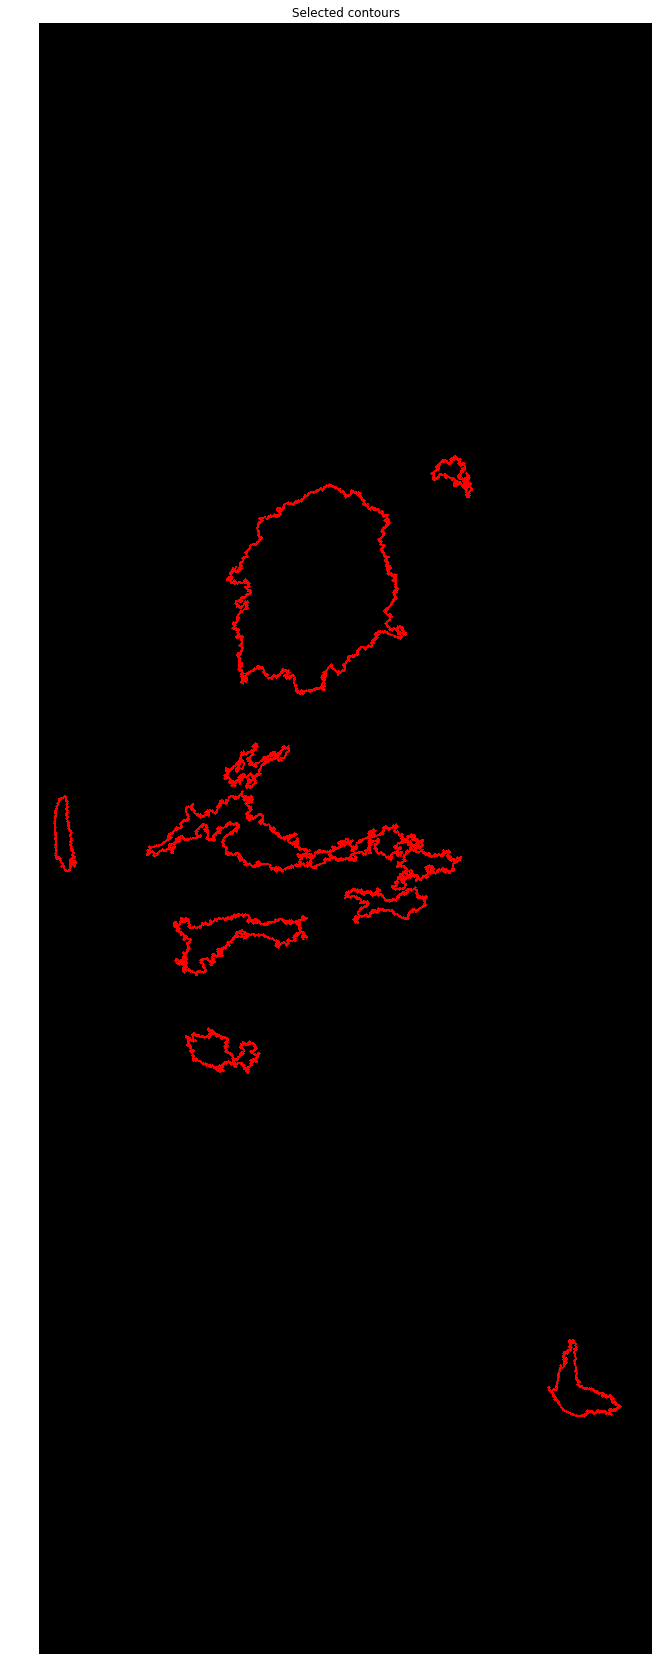

In [16]:
mm_shape = mm.image_data.shape

img_color2 = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color2, contours2, -1, (255,0,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color2,'Selected contours')

## Reading features of several images

`get_dataset_features` function can be used for feature extraction from whole dataset.

In [18]:
from immas import get_dataset_features

help(get_dataset_features)

Help on function get_dataset_features in module immas.features.get_features:

get_dataset_features(data)
    Function returns list of features for all of the mammograms.
    
    Args:
        data ([MammogramImage]): list (iterable) of the mammograms from dataset.
    
    Returns:
        pandas.DataFrame: feature of all images combined in one data table.



In [20]:
# let's create sample dataset of two images
path_image1 = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask1 = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth1 = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle1 = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

path_image2 = "../dataset/images/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"
path_mask2 = "../dataset/masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.png"
pectoral_muscle2 = "../dataset/pectoral_muscle_masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"

mm1 = MammogramImage(path_image1, 
                     path_mask1, 
                     ground_truth_path=path_ground_truth1, 
                     pmuscle_mask_path=pectoral_muscle1,
                     load_data=False)
mm2 = MammogramImage(path_image2, 
                     path_mask2, 
                     pmuscle_mask_path=pectoral_muscle2,
                     load_data=False)
dataset = [mm1, mm2]

In [21]:
# read features of all images in the dataset
dataset_features = get_dataset_features(dataset)

/home/okozyn/Projects/AIA-2018/immas/segmentation.py:49: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [22]:
dataset_features

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,4224.076784,23302.5,60.932813,382.429415,32682.298070,19071.931634,1.0,-2.158255e+10,-1.0
1,2123.929265,12183.0,29.465648,413.464526,32596.632523,18801.860807,1.0,-2.345094e+09,-1.0
2,964.354461,7791.5,9.498225,820.311172,32766.357361,18938.463817,1.0,4.447417e+10,-1.0
3,1184.888512,5667.5,19.713039,287.500063,33529.324276,18959.452991,1.0,-1.479250e+11,-1.0
4,1136.420477,4818.0,21.330520,225.873538,32298.799508,18939.138184,1.0,1.376212e+11,-1.0
5,1393.682449,4751.5,32.530225,146.064161,32703.288885,18810.358412,1.0,4.602172e+10,-1.0
6,549.612259,3826.0,6.282869,608.957485,32882.951665,19062.852484,1.0,-1.526180e+11,-1.0
7,1219.917949,2752.5,43.025314,63.973966,32506.762227,18756.725175,1.0,2.003122e+11,-1.0
8,550.139171,1592.5,15.123623,105.298845,33364.647771,19043.606217,1.0,-5.853688e+11,-1.0
9,705.962545,1480.5,26.788293,55.266679,32823.145928,18891.401731,1.0,-1.780862e+11,-1.0


### Our dataset features can be easily saved into `.csv` file for futher usage

In [23]:
dataset_features.to_csv("./sample-features.csv")